In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eyecascade = cv2.CascadeClassifier("Haar/haarcascade_eye.xml")
mouthcascade = cv2.CascadeClassifier("Haar/Mouth.xml")

In [3]:
im1 = cv2.imread("FFHQ/00000.png")
im = cv2.imread('FFHQ/00003.png')
im14 = cv2.imread('FFHQ/00050.png')

In [4]:
def find_eyes(img, eyecascade):
    if len(img.shape) == 3 and img.shape[2] == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    eyes = eyecascade.detectMultiScale(gray, scaleFactor=1.1, minSize=(30,30), minNeighbors=5)
    eye_coords = []
    for (x, y, w, h) in eyes[:2]: 
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, 'Eye', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)
        eye_coords.append((x, y, w, h))
    return eye_coords

def find_mouth(img, mouthcascade):
    if len(img.shape) == 3 and img.shape[2] == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    mouth = mouthcascade.detectMultiScale(gray, scaleFactor=1.1, minSize=(120,75), minNeighbors=8)
    mouth_coords = []
    if len(mouth) > 0:  
        x, y, w, h = mouth[0] 
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.putText(img, 'Mouth', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)
        mouth_coords.append((x, y, w, h))
    else:
        return[]
    return mouth_coords

def detect_features(img, eyecascade, mouthcascade):
    if len(img.shape) == 3 and img.shape[2] == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    result = find_eyes(gray, eyecascade)
    outcome1 = find_mouth(gray, mouthcascade)
    
    for (x, y, w, h) in result:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, 'Eye', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)
    

    if len(outcome1) > 0:
        (x, y, w, h) = outcome1[0] 
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.putText(img, 'Mouth', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)
    
    output = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return output

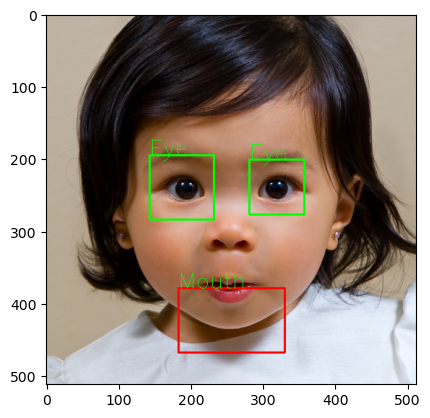

In [5]:
detect_features(im, eyecascade, mouthcascade)

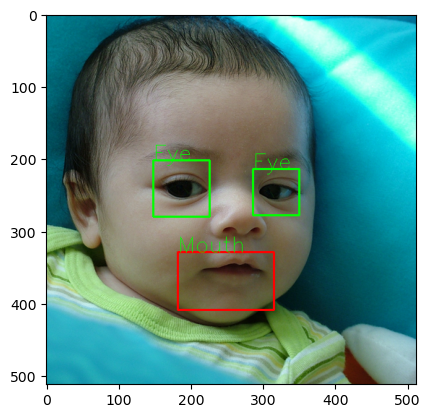

In [6]:
detect_features(im1, eyecascade, mouthcascade)

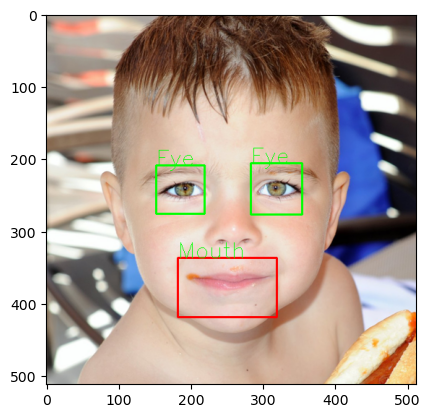

In [7]:
detect_features(im14, eyecascade, mouthcascade)